###Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/Data Science assignment /Datasets/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Data Science assignment /Datasets/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Data Science assignment /Datasets/Transactions.csv')

# Check basic info
datasets = {'Customers': customers, 'Products': products, 'Transactions': transactions}
for name, df in datasets.items():
    print(f"\n{name} Dataset Info:")
    print(df.info())
    print(df.head())



Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0 

Utility Functions for EDA

In [3]:
def plot_bar(data, title, xlabel, ylabel, figsize=(8, 5), palette="viridis", rotation=0):
    """Creates a bar plot."""
    plt.figure(figsize=figsize)
    sns.barplot(x=data.index, y=data.values, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

def summarize_group(data, group_col, agg_col, agg_funcs):
    """Summarizes grouped data with multiple aggregations."""
    summary = data.groupby(group_col)[agg_col].agg(agg_funcs)
    return summary.reset_index()


  Customers Analysis

<ipython-input-3-d8e24eac447b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=palette)


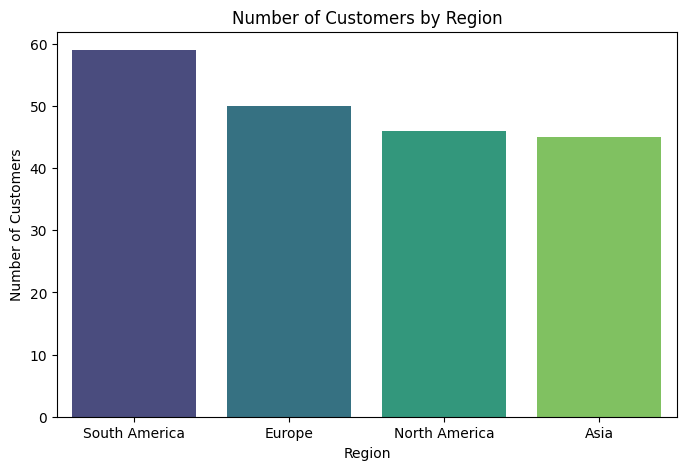

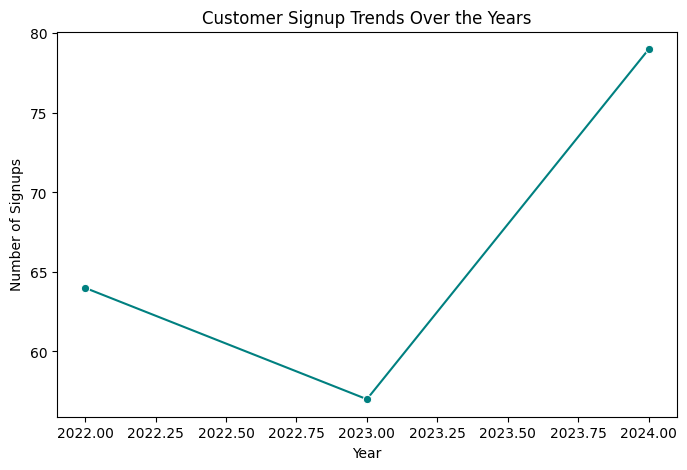

In [4]:
# Count customers by region
region_counts = customers['Region'].value_counts()
plot_bar(region_counts, "Number of Customers by Region", "Region", "Number of Customers")

# Analyze signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker='o', color='teal')
plt.title("Customer Signup Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


Products Analysis

<ipython-input-3-d8e24eac447b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=palette)


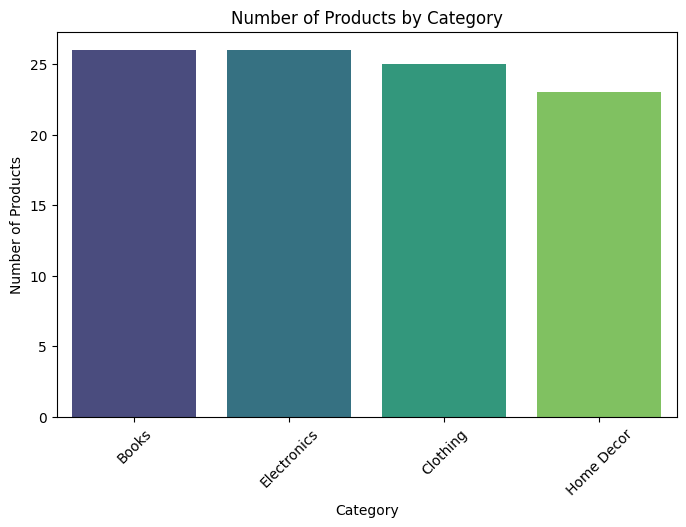

Price Range by Category:
       Category    min     max        mean
0        Books  33.59  497.76  292.212308
1     Clothing  18.82  481.78  263.720000
2  Electronics  16.08  459.86  275.353462
3   Home Decor  41.18  454.53  235.020000


In [5]:
# Count products by category
category_counts = products['Category'].value_counts()
plot_bar(category_counts, "Number of Products by Category", "Category", "Number of Products", rotation=45)

# Price range by category
price_range = summarize_group(products, 'Category', 'Price', ['min', 'max', 'mean'])
print("Price Range by Category:\n", price_range)


Transactions Analysis

In [10]:
# Step 1: Verify loaded data
print("Transactions DataFrame Columns:", transactions.columns)
print("Sample Data:\n", transactions.head())

# Step 2: Ensure required columns are present
required_columns = ['CustomerID', 'TotalValue', 'Quantity', 'TransactionID']
missing_columns = [col for col in required_columns if col not in transactions.columns]

if missing_columns:
    print(f"Missing columns in Transactions data: {missing_columns}")
else:
    print("All required columns are present. Proceeding...")

# Step 3: Perform Aggregation
try:
    customer_transactions = transactions.groupby('CustomerID').agg({
        'TotalValue': 'sum',   # Total spending
        'Quantity': 'sum',     # Total quantity purchased
        'TransactionID': 'count'  # Total transactions
    }).reset_index().rename(columns={'TransactionID': 'TransactionCount'})
    print("Aggregation successful! Sample output:\n", customer_transactions.head())
except Exception as e:
    print(f"Error during aggregation: {e}")


Transactions DataFrame Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'YearMonth'],
      dtype='object')
Sample Data:
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price YearMonth  
0      300.68  300.68   2024-08  
1      300.68  300.68   2024-05  
2      300.68  300.68   2024-04  
3      601.36  300.68   2024-03  
4      902.04  300.68   2024-03  
All required columns are present. Proceeding...
Aggregation successful! Sample output:
   CustomerID  TotalValue  Quantity  TransactionCount
0      C0001     3354.52        12      

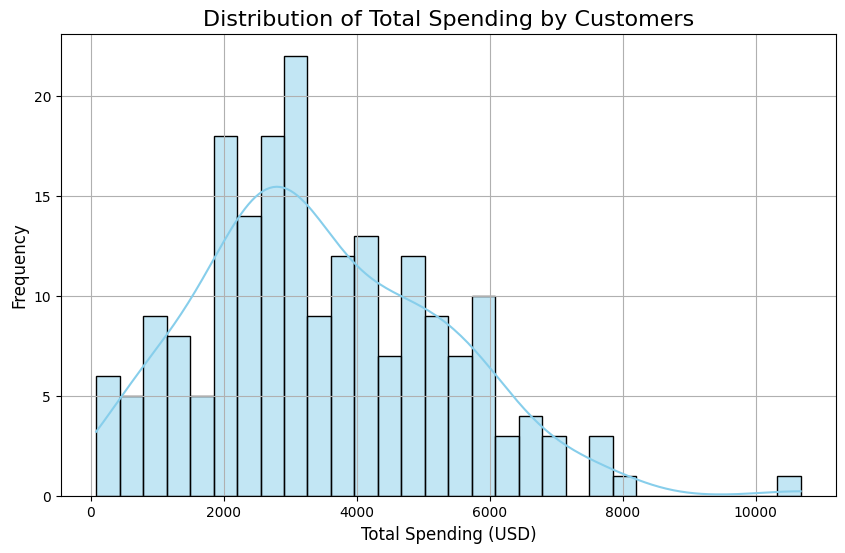

<ipython-input-11-9211565c459c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


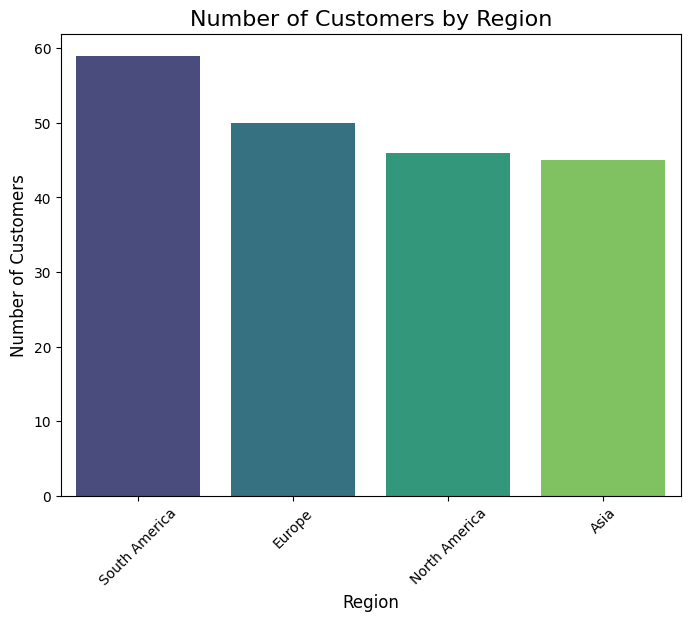

<ipython-input-11-9211565c459c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_spending.index, y=region_spending.values, palette='coolwarm')


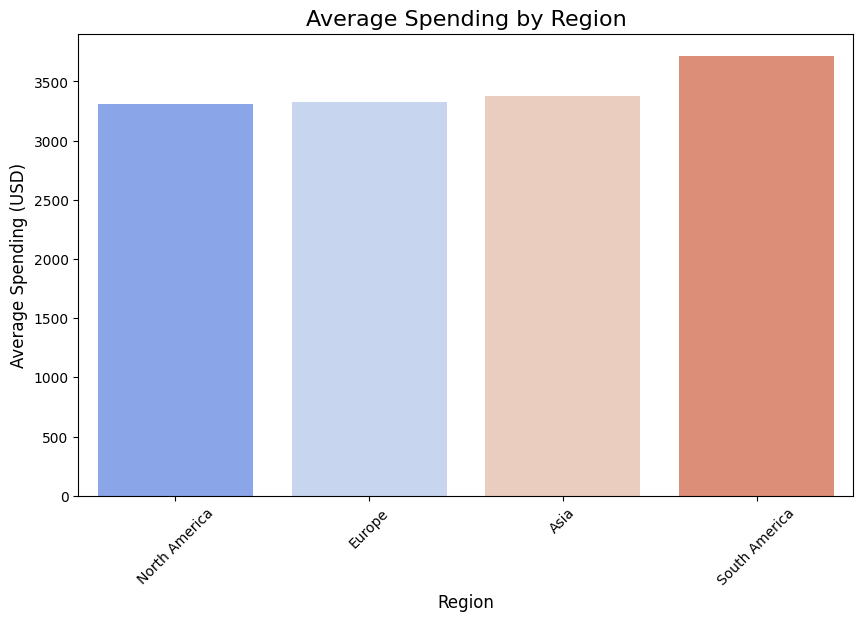

<ipython-input-11-9211565c459c>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='rocket')


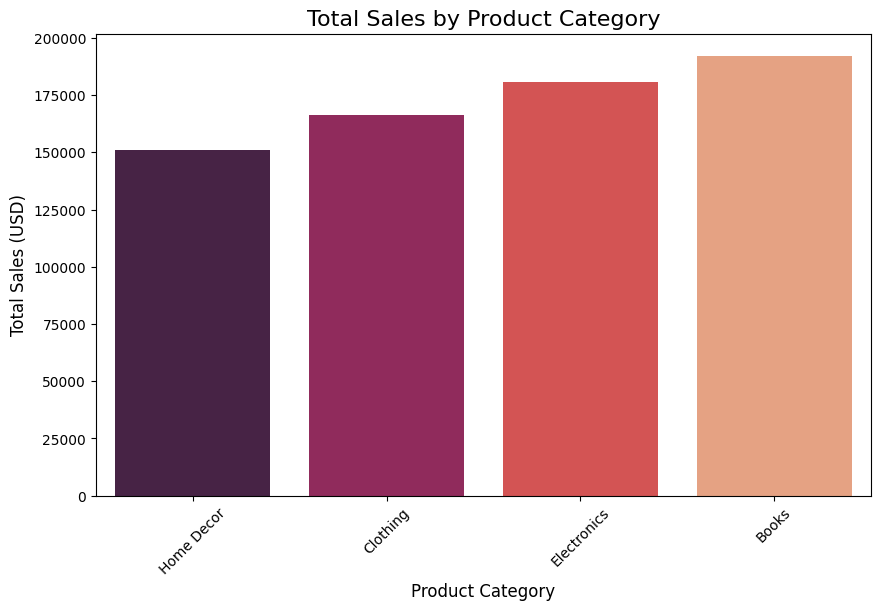

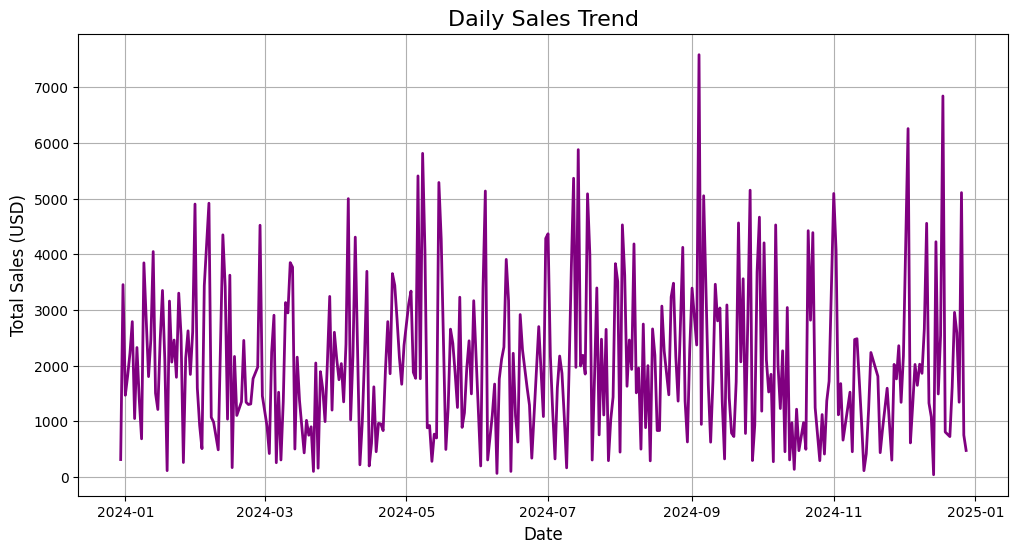

<ipython-input-11-9211565c459c>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers['CustomerID'], y=top_customers['TotalValue'], palette='magma')


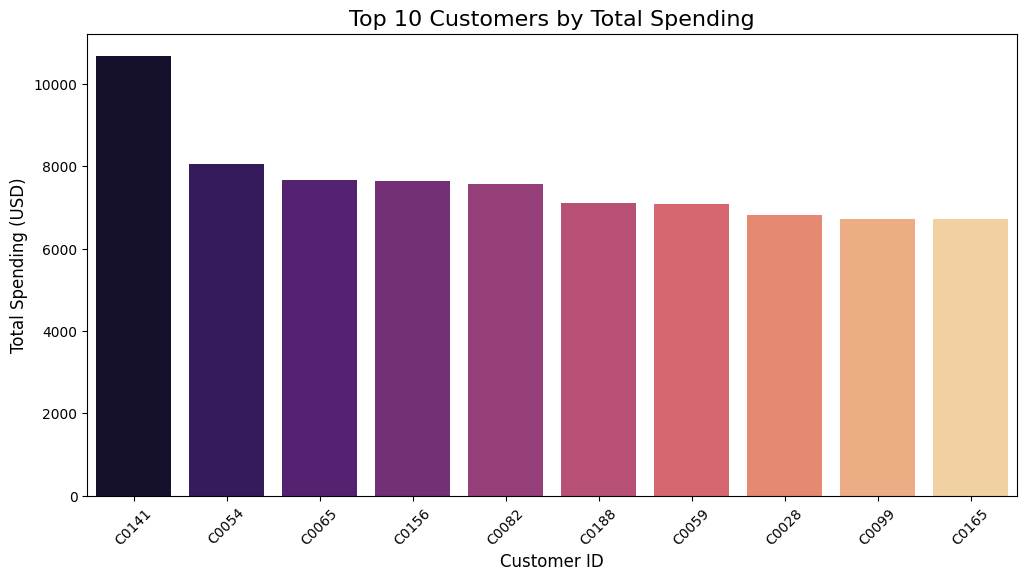

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display properly in Jupyter Notebook
%matplotlib inline

# Step 1: Distribution of Total Spending by Customers
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions['TotalValue'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Spending by Customers', fontsize=16)
plt.xlabel('Total Spending (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Step 2: Region-wise Distribution of Customers
plt.figure(figsize=(8, 6))
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Customers by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Step 3: Average Spending by Region
merged_data = customers.merge(customer_transactions, on='CustomerID', how='left').fillna(0)
region_spending = merged_data.groupby('Region')['TotalValue'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_spending.index, y=region_spending.values, palette='coolwarm')
plt.title('Average Spending by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Spending (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Step 4: Category-wise Total Sales (from Products and Transactions)
product_sales = transactions.merge(products, on='ProductID')
category_sales = product_sales.groupby('Category')['TotalValue'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='rocket')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Step 5: Trend of Transactions Over Time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='purple', linewidth=2)
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.grid(True)
plt.show()

# Step 6: Top 10 Customers by Total Spending
top_customers = customer_transactions.sort_values('TotalValue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers['CustomerID'], y=top_customers['TotalValue'], palette='magma')
plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()
